Goal: 
    To classify Lithofacies Lithology

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio

las5 = lasio.read("./visualize-well-log/train-data/15_9-13.las.txt")

df5 = las5.df()

df5.info()

In [4]:
# Train data

las1 = lasio.read("../well-log-data/15_9-13.las")
las2 = lasio.read("../well-log-data/16_8-1.las")
las3 = lasio.read("../well-log-data/25_11-5.las")
las4 = lasio.read("../well-log-data/25_6-3.las")

In [5]:
# convert las files to dataframe

df1 = las1.df()
df2 = las2.df()
df3 = las3.df()
df4 = las4.df()

In [6]:
df1.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RXO,SP,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.224701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df1["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df2["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df3["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df4["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())

[   nan 65000. 30000. 65030. 70000. 99000. 80000. 86000. 74000.]
[   nan 65000. 65030. 70000. 74000. 99000. 30000. 80000. 70032.]
[   nan 65000. 30000. 70032. 80000. 70000. 65030.]
[   nan 65000. 65030. 30000. 70000. 99000. 80000.]


In [8]:
# Import test data

las5 = lasio.read("../well-log-data/31_2-21 S.las")

In [9]:
test_df = las5.df()

In [10]:
print(test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())

[   nan 70000. 80000. 65000. 65030. 30000. 90000.]


## Preparation of Data
### Preparing Train Dataset

In [11]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RSHA                               1623 non-null   float64
 7   RMED                               20957 non-null  float64
 8   RXO                                1627 non-null   float64
 9   SP                                 20956 non-null  float64
 10  DTC                                21282 non-null  float64
 11  NPHI                               14105 no

None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  6700 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   6685 non-null   float64
 2   CALI                               6709 non-null   float64
 3   MUDWEIGHT                          13706 non-null  float64
 4   ROP                                14418 non-null  float64
 5   RDEP                               11888 non-null  float64
 6   RSHA                               11888 non-null  float64
 7   RMED                               11887 non-null  float64
 8   SP                                 11888 non-null  float64
 9   DTC                                13935 non-null  float64
 10  NPHI                               4987 non-null   float64
 11  GR                         

None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  5059 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   5060 non-null   float64
 2   CALI                               11777 non-null  float64
 3   BS                                 13266 non-null  float64
 4   DCAL                               11777 non-null  float64
 5   MUDWEIGHT                          12783 non-null  float64
 6   ROP                                12807 non-null  float64
 7   RDEP                               11730 non-null  float64
 8   RMED                               11731 non-null  float64
 9   SP                                 11686 non-null  float64
 10  DTC                                10571 non-null  float64
 11  NPHI                       

None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RSHA                               8245 non-null   float64
 8   RMED                               14972 non-null  float64
 9   RMIC                               8246 non-null   float64
 10  SP                                 5020 non-null   float64
 11  DTS                        

None

In [12]:
display(df1.isna().sum())
display(df2.isna().sum())
display(df3.isna().sum())
display(df4.isna().sum())

FORCE_2020_LITHOFACIES_CONFIDENCE     3164
FORCE_2020_LITHOFACIES_LITHOLOGY      3171
CALI                                  3096
MUDWEIGHT                             3921
ROP                                   1144
RDEP                                   485
RSHA                                 19818
RMED                                   484
RXO                                  19814
SP                                     485
DTC                                    159
NPHI                                  7336
PEF                                   4995
GR                                     541
RHOB                                  3096
DRHO                                  3096
DEPTH_MD                               485
X_LOC                                  485
Y_LOC                                  485
Z_LOC                                  485
dtype: int64

FORCE_2020_LITHOFACIES_CONFIDENCE    7886
FORCE_2020_LITHOFACIES_LITHOLOGY     7901
CALI                                 7877
MUDWEIGHT                             880
ROP                                   168
RDEP                                 2698
RSHA                                 2698
RMED                                 2699
SP                                   2698
DTC                                   651
NPHI                                 9599
GR                                     46
RHOB                                 7877
DRHO                                 7874
DEPTH_MD                             2698
X_LOC                                2698
Y_LOC                                2698
Z_LOC                                2698
dtype: int64

FORCE_2020_LITHOFACIES_CONFIDENCE    8278
FORCE_2020_LITHOFACIES_LITHOLOGY     8277
CALI                                 1560
BS                                     71
DCAL                                 1560
MUDWEIGHT                             554
ROP                                   530
RDEP                                 1607
RMED                                 1606
SP                                   1651
DTC                                  2766
NPHI                                 6677
GR                                     58
RHOB                                 8178
DRHO                                 8180
DEPTH_MD                             1607
X_LOC                                1607
Y_LOC                                1607
Z_LOC                                1607
dtype: int64

FORCE_2020_LITHOFACIES_CONFIDENCE     3379
FORCE_2020_LITHOFACIES_LITHOLOGY      3394
CALI                                  3349
BS                                     328
MUDWEIGHT                             7158
ROP                                     16
RDEP                                   375
RSHA                                  7143
RMED                                   416
RMIC                                  7142
SP                                   10368
DTS                                   3269
DTC                                   3218
NPHI                                  7167
GR                                     494
RHOB                                  7141
DEPTH_MD                               375
X_LOC                                  375
Y_LOC                                  375
Z_LOC                                  375
dtype: int64

#### Drop columns that are <70%

In [13]:
df1 = df1.drop(["RSHA", "RXO"], axis=1)
df2 = df2.drop(["DRHO"], axis=1)
df3 = df3.drop(["DRHO"], axis=1)
# df4 = df4.drop(["RHOB"], axis=1)

#### Drop columns that are not mutually included in all dataset

In [14]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RMED                               20957 non-null  float64
 7   SP                                 20956 non-null  float64
 8   DTC                                21282 non-null  float64
 9   NPHI                               14105 non-null  float64
 10  PEF                                16446 non-null  float64
 11  GR                                 20900 no

None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  6700 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   6685 non-null   float64
 2   CALI                               6709 non-null   float64
 3   MUDWEIGHT                          13706 non-null  float64
 4   ROP                                14418 non-null  float64
 5   RDEP                               11888 non-null  float64
 6   RSHA                               11888 non-null  float64
 7   RMED                               11887 non-null  float64
 8   SP                                 11888 non-null  float64
 9   DTC                                13935 non-null  float64
 10  NPHI                               4987 non-null   float64
 11  GR                         

None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  5059 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   5060 non-null   float64
 2   CALI                               11777 non-null  float64
 3   BS                                 13266 non-null  float64
 4   DCAL                               11777 non-null  float64
 5   MUDWEIGHT                          12783 non-null  float64
 6   ROP                                12807 non-null  float64
 7   RDEP                               11730 non-null  float64
 8   RMED                               11731 non-null  float64
 9   SP                                 11686 non-null  float64
 10  DTC                                10571 non-null  float64
 11  NPHI                       

None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RSHA                               8245 non-null   float64
 8   RMED                               14972 non-null  float64
 9   RMIC                               8246 non-null   float64
 10  SP                                 5020 non-null   float64
 11  DTS                        

None

In [15]:
df1 = df1.drop(["PEF", "DRHO"], axis=1)
df2 = df2.drop(["RSHA"], axis=1)
df3 = df3.drop(["BS", "DCAL"], axis=1)
df4 = df4.drop(["DTS", "RSHA", "RMIC", "BS"], axis=1)

In [16]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RMED                               20957 non-null  float64
 7   SP                                 20956 non-null  float64
 8   DTC                                21282 non-null  float64
 9   NPHI                               14105 non-null  float64
 10  GR                                 20900 non-null  float64
 11  RHOB                               18345 no

None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  6700 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   6685 non-null   float64
 2   CALI                               6709 non-null   float64
 3   MUDWEIGHT                          13706 non-null  float64
 4   ROP                                14418 non-null  float64
 5   RDEP                               11888 non-null  float64
 6   RMED                               11887 non-null  float64
 7   SP                                 11888 non-null  float64
 8   DTC                                13935 non-null  float64
 9   NPHI                               4987 non-null   float64
 10  GR                                 14540 non-null  float64
 11  RHOB                       

None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  5059 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   5060 non-null   float64
 2   CALI                               11777 non-null  float64
 3   MUDWEIGHT                          12783 non-null  float64
 4   ROP                                12807 non-null  float64
 5   RDEP                               11730 non-null  float64
 6   RMED                               11731 non-null  float64
 7   SP                                 11686 non-null  float64
 8   DTC                                10571 non-null  float64
 9   NPHI                               6660 non-null   float64
 10  GR                                 13279 non-null  float64
 11  RHOB                       

None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   MUDWEIGHT                          8230 non-null   float64
 4   ROP                                15372 non-null  float64
 5   RDEP                               15013 non-null  float64
 6   RMED                               14972 non-null  float64
 7   SP                                 5020 non-null   float64
 8   DTC                                12170 non-null  float64
 9   NPHI                               8221 non-null   float64
 10  GR                                 14894 non-null  float64
 11  RHOB                       

None

In [17]:
display(df1.shape,df2.shape,df3.shape, df4.shape)

(21441, 16)

(14586, 16)

(13337, 16)

(15388, 16)

In [18]:
merged_df = pd.concat([df1, df2, df3, df4])
merged_df.shape

(64752, 16)

In [19]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 65000., 30000., 65030., 70000., 99000., 80000., 86000.,
       74000., 70032.])

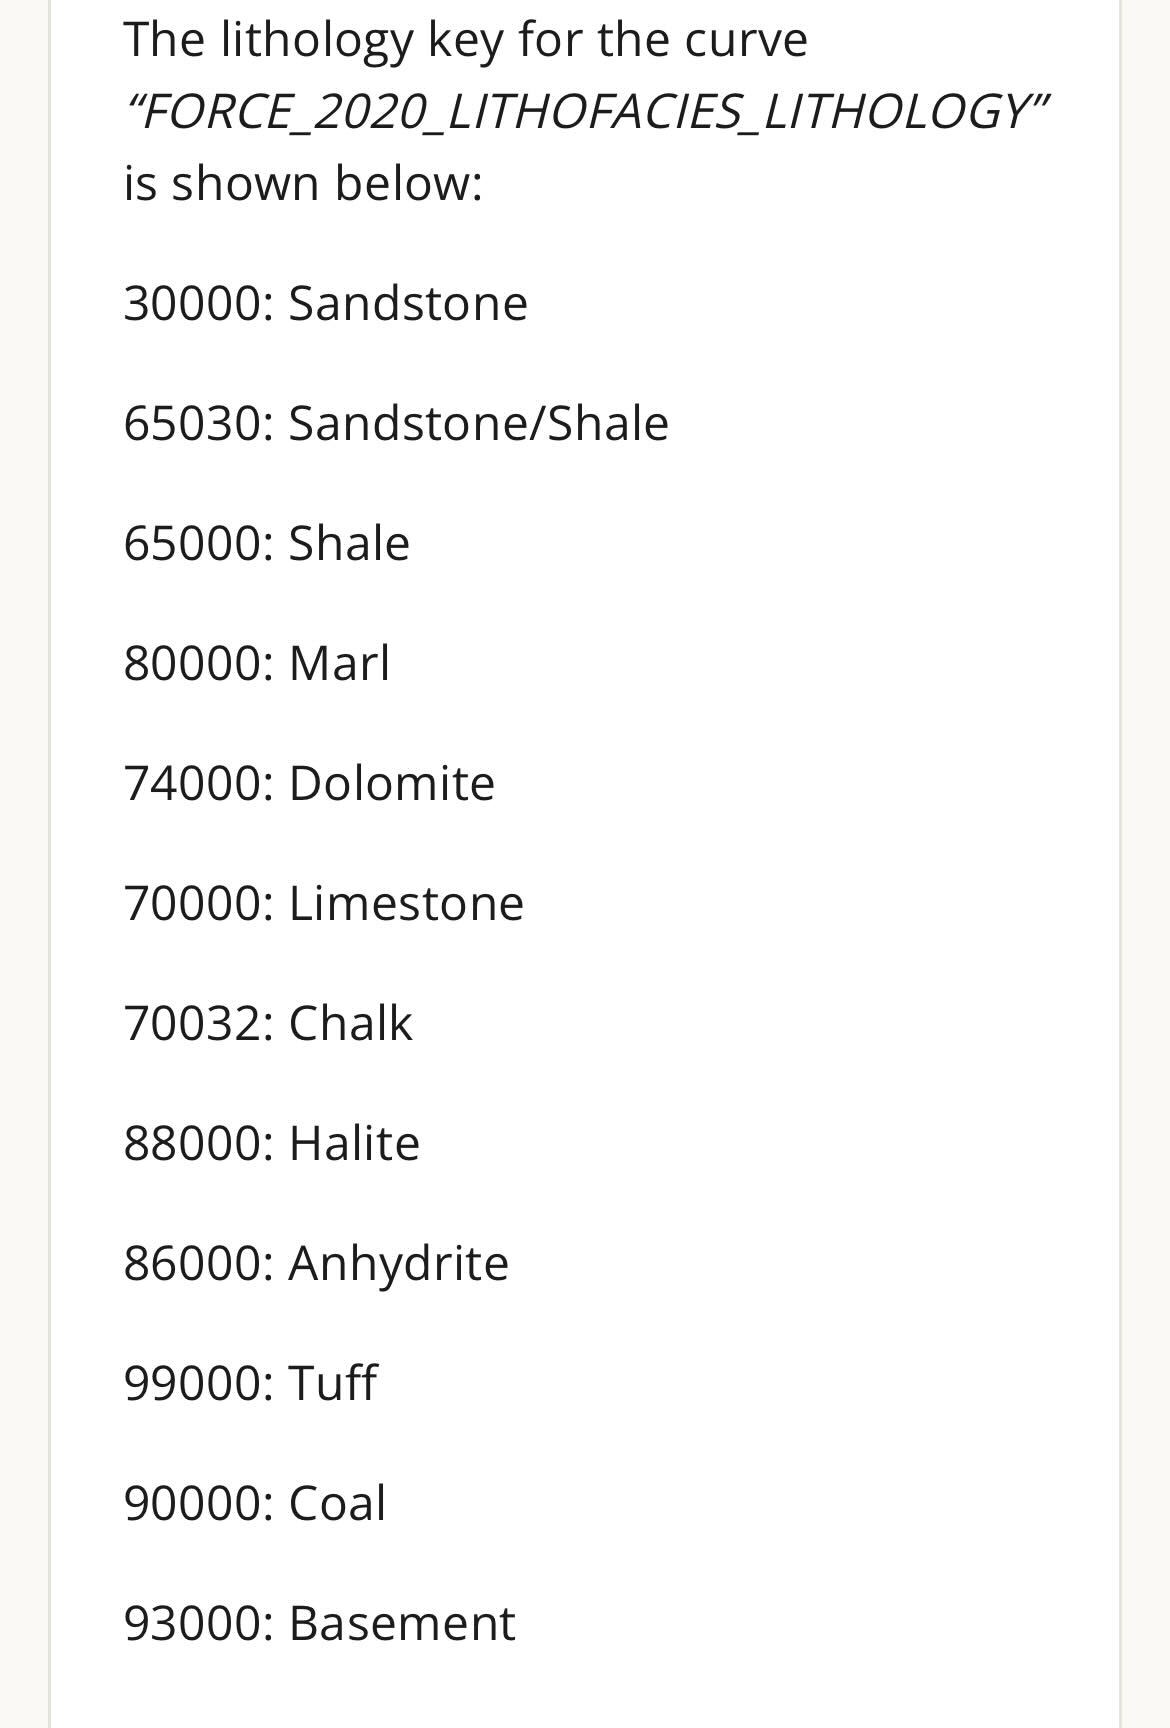

In [20]:
lithology = {
    30000: [0, "Sandstone"],
    65000: [1, "Shale"],
    65030: [2, "Sandstone/Stone"],
    70000: [3, "Limestone"],
    70032: [4, "Chalk"],
    74000: [5, "Dolomite"],
    80000: [6, "Marl"],
    86000: [7, "Anhydrite"],
    99000: [8, "Tuff"],
    90000: [9, "Coal"]
}

In [21]:
lithology[30000][1]

'Sandstone'

#### Replace column's entries with corresponding discrete values

In [22]:
for key, value in lithology.items():
        merged_df.loc[merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithology[key][0]

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  42045 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   42009 non-null  float64
 2   CALI                               48870 non-null  float64
 3   MUDWEIGHT                          52239 non-null  float64
 4   ROP                                62894 non-null  float64
 5   RDEP                               59587 non-null  float64
 6   RMED                               59547 non-null  float64
 7   SP                                 49550 non-null  float64
 8   DTC                                57958 non-null  float64
 9   NPHI                               33973 non-null  float64
 10  GR                                 63613 non-null  float64
 11  RHOB                               38460 n

In [24]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([nan,  1.,  0.,  2.,  3.,  8.,  6.,  7.,  5.,  4.])

### Preparing Test Dataset

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   BS                                 18674 non-null  float64
 4   ROPA                               18680 non-null  float64
 5   ROP                                18664 non-null  float64
 6   RDEP                               18567 non-null  float64
 7   RMED                               18524 non-null  float64
 8   DTS                                15252 non-null  float64
 9   DTC                                18199 non-null  float64
 10  NPHI                               7835 non-null   float64
 11  PEF                                7800 n

In [26]:
test_df.drop(["BS", "ROPA", "DTS", "PEF", "DRHO"], axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   ROP                                18664 non-null  float64
 4   RDEP                               18567 non-null  float64
 5   RMED                               18524 non-null  float64
 6   DTC                                18199 non-null  float64
 7   NPHI                               7835 non-null   float64
 8   GR                                 18666 non-null  float64
 9   RHOB                               7800 non-null   float64
 10  DEPTH_MD                           18567 non-null  float64
 11  X_LOC                              18567 

Looking at our test dataset, we can see that the columns available here doesn't match the ones in our merged dataset. 
we would be drop the columns in the merged df that are not in the test df

In [27]:
merged_df.drop(["MUDWEIGHT", "SP"], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  42045 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   42009 non-null  float64
 2   CALI                               48870 non-null  float64
 3   ROP                                62894 non-null  float64
 4   RDEP                               59587 non-null  float64
 5   RMED                               59547 non-null  float64
 6   DTC                                57958 non-null  float64
 7   NPHI                               33973 non-null  float64
 8   GR                                 63613 non-null  float64
 9   RHOB                               38460 non-null  float64
 10  DEPTH_MD                           59587 non-null  float64
 11  X_LOC                              59587 n

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   ROP                                18664 non-null  float64
 4   RDEP                               18567 non-null  float64
 5   RMED                               18524 non-null  float64
 6   DTC                                18199 non-null  float64
 7   NPHI                               7835 non-null   float64
 8   GR                                 18666 non-null  float64
 9   RHOB                               7800 non-null   float64
 10  DEPTH_MD                           18567 non-null  float64
 11  X_LOC                              18567 

In [29]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 70000., 80000., 65000., 65030., 30000., 90000.])

In [30]:
# change columns datatype from float64 to int64
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  42045 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   42009 non-null  float64
 2   CALI                               48870 non-null  float64
 3   ROP                                62894 non-null  float64
 4   RDEP                               59587 non-null  float64
 5   RMED                               59547 non-null  float64
 6   DTC                                57958 non-null  float64
 7   NPHI                               33973 non-null  float64
 8   GR                                 63613 non-null  float64
 9   RHOB                               38460 non-null  float64
 10  DEPTH_MD                           59587 non-null  float64
 11  X_LOC                              59587 n

In [32]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")

In [33]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 1, 0, 2, 3, 8, 6, 7, 5, 4]
Length: 10, dtype: Int64

In [34]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 70000, 80000, 65000, 65030, 30000, 90000]
Length: 7, dtype: Int64

#### Replace column's entries with corresponding discrete values

In [35]:
for key, value in lithology.items():
    test_df.loc[test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithology[key][0]

In [36]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 3, 6, 1, 2, 0, 9]
Length: 7, dtype: Int64

In [37]:
test_df.describe()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,ROP,RDEP,RMED,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,7841.000000,7840.000000,7842.000000,18664.000000,18567.000000,18524.000000,18199.000000,7835.000000,18666.000000,7800.000000,18567.000000,18567.000000,1.856700e+04,18567.000000
mean,1.007014,1.127041,8.645759,30.832899,2.620270,2.552476,113.930604,0.282503,88.059741,2.423469,1790.928400,525234.926210,6.759899e+06,-1697.212986
std,0.083463,1.125013,0.354859,22.168637,10.496727,8.401663,33.930530,0.079752,28.029797,0.140661,814.716285,152.418737,1.216211e+02,752.738270
min,1.000000,0.000000,8.350532,0.000000,0.196063,0.218748,51.216694,0.005246,9.397405,1.259571,379.912415,524869.937500,6.759756e+06,-2964.480713
25%,1.000000,1.000000,8.485698,16.759844,0.962309,0.942606,83.164452,0.239417,72.368660,2.356557,1085.420410,525136.281250,6.759822e+06,-2349.475097
50%,1.000000,1.000000,8.536774,27.777618,1.429376,1.405266,103.830116,0.289869,89.986179,2.432674,1790.928345,525287.062500,6.759851e+06,-1730.521484
75%,1.000000,1.000000,8.642059,42.716022,3.237903,3.178944,148.459099,0.327477,100.472012,2.518349,2496.436401,525345.437500,6.759974e+06,-1053.585938
max,2.000000,9.000000,12.631611,1270.482178,1122.036377,679.883728,183.871933,0.906257,243.851028,3.209886,3201.944336,525414.312500,6.760192e+06,-348.912415


### drop rows where FORCE_2020_LITHOFACIES_LITHOLOGY is nan

In [38]:
merged_df.dropna(subset=["FORCE_2020_LITHOFACIES_LITHOLOGY"], inplace=True)

In [39]:
test_df.dropna(subset=["FORCE_2020_LITHOFACIES_LITHOLOGY"], inplace=True)

In [40]:
test_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE      0
FORCE_2020_LITHOFACIES_LITHOLOGY       0
CALI                                   0
ROP                                    0
RDEP                                   0
RMED                                   0
DTC                                  154
NPHI                                  28
GR                                     0
RHOB                                  45
DEPTH_MD                               0
X_LOC                                  0
Y_LOC                                  0
Z_LOC                                  0
dtype: int64

In [41]:
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE       6
FORCE_2020_LITHOFACIES_LITHOLOGY        0
CALI                                    0
ROP                                   179
RDEP                                    0
RMED                                   41
DTC                                   193
NPHI                                 9731
GR                                      9
RHOB                                 3795
DEPTH_MD                                0
X_LOC                                   0
Y_LOC                                   0
Z_LOC                                   0
dtype: int64

# Building the XGBoost Machine learning model

In [42]:
import xgboost as xgb

In [43]:
model = xgb.XGBClassifier()

### Split dataset into X_train and y_train

In [44]:
X_train = merged_df.drop("FORCE_2020_LITHOFACIES_LITHOLOGY", axis=1)
y_train = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

In [45]:
X_test = test_df.drop("FORCE_2020_LITHOFACIES_LITHOLOGY", axis=1)
y_test = test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

In [46]:
y_train.info()

<class 'pandas.core.series.Series'>
Float64Index: 42009 entries, 494.528 to 2451.5397289
Series name: FORCE_2020_LITHOFACIES_LITHOLOGY
Non-Null Count  Dtype
--------------  -----
42009 non-null  Int64
dtypes: Int64(1)
memory usage: 697.4 KB


In [47]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

model.score(X_test, y_test)

### Feature Engineering
After failed attempt at testing our model, the error message seems to be from our target values not being properly represented
we would be using the `pd.dummies` to encode the entire column

dummies = pd.get_dummies(merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"])
dummies

dummies.info()

Drop one of the dummie variable columns, to avoid getting in a dummy variable trap

new_merged_df = pd.concat([merged_df, dummies], axis=1)

new_merged_df = new_merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY", 8], axis=1)

X_train = new_merged_df.drop([0, 1, 2, 3, 4, 5, 6, 7], axis=1)
y_train = new_merged_df[[0, 1, 2, 3, 4, 5, 6, 7]]

X_train.info()

y_train.info()

encoded_model = xgb.XGBClassifier()
encoded_model.fit(X_train, y_train)

# encoding for the test set
dummies = pd.get_dummies(test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"])
dummies

new_test_df = pd.concat([test_df, dummies], axis=1)
new_test_df = new_test_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY", 9], axis=1)

X_test = new_test_df.drop([0, 1, 2, 3, 6], axis=1)
y_test = new_test_df[[0, 1, 2, 3, 6]]

y_test.shape

y_train.shape

encoded_model.score(X_test, y_test)

y_test.head()

y_train.head()

new_cols = [4, 5, 7]
for col in new_cols:
    y_test[col] = 0  # Fill new columns with zeros

y_test.info()

y_test.shape

encoded_model.score(X_test, y_test)

y_preds = encoded_model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [49]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

### Adjust Hyper Parameter for new model

xgb_clf_2 = xgb.XGBClassifier(max_depth=10, n_estimators=100)

xgb_clf_2.fit(X_train, y_train)
y_preds_2 = xgb_clf_2.predict(X_test)

clf_2_metrics = evaluate_preds(y_test, y_preds_2)
clf_2_metrics

## Hyper Parameter Optimization

In [ ]:
params={
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [ 1, 3, 5, 7 ],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ]
}

### Using RandomizedSearchCV to highlight the best params combination

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_search = RandomizedSearchCV(encoded_model, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

random_search

random_search.fit(X_train, y_train)

random_search.best_params_

rs_y_preds = random_search.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

merged_df.head()

merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

## Import RandomForestClassifier model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf = RandomForestClassifier(n_estimators=100)

In [54]:
### Split into train and test dataset

In [55]:
merged_df.shape

(42009, 14)

In [56]:
test_df.shape

(7840, 14)

In [57]:
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE       6
FORCE_2020_LITHOFACIES_LITHOLOGY        0
CALI                                    0
ROP                                   179
RDEP                                    0
RMED                                   41
DTC                                   193
NPHI                                 9731
GR                                      9
RHOB                                 3795
DEPTH_MD                                0
X_LOC                                   0
Y_LOC                                   0
Z_LOC                                   0
dtype: int64

In [58]:
test_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE      0
FORCE_2020_LITHOFACIES_LITHOLOGY       0
CALI                                   0
ROP                                    0
RDEP                                   0
RMED                                   0
DTC                                  154
NPHI                                  28
GR                                     0
RHOB                                  45
DEPTH_MD                               0
X_LOC                                  0
Y_LOC                                  0
Z_LOC                                  0
dtype: int64

In [59]:
merged_df.dropna(inplace=True)
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
CALI                                 0
ROP                                  0
RDEP                                 0
RMED                                 0
DTC                                  0
NPHI                                 0
GR                                   0
RHOB                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
dtype: int64

In [60]:
test_df.dropna(inplace=True)
test_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
CALI                                 0
ROP                                  0
RDEP                                 0
RMED                                 0
DTC                                  0
NPHI                                 0
GR                                   0
RHOB                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
dtype: int64

### Split dataset into X_train and y_train

In [61]:
X_train = merged_df.drop("FORCE_2020_LITHOFACIES_LITHOLOGY", axis=1)
y_train = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

In [62]:
X_test = test_df.drop("FORCE_2020_LITHOFACIES_LITHOLOGY", axis=1)
y_test = test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

In [63]:
y_train.info()

<class 'pandas.core.series.Series'>
Float64Index: 31934 entries, 1138.704 to 2450.4757289
Series name: FORCE_2020_LITHOFACIES_LITHOLOGY
Non-Null Count  Dtype
--------------  -----
31934 non-null  Int64
dtypes: Int64(1)
memory usage: 530.2 KB


In [64]:
y_train = y_train.astype('int')

In [65]:
y_test = y_test.astype('int')

In [66]:
y_test.info()

<class 'pandas.core.series.Series'>
Float64Index: 7637 entries, 2006.7684 to 3168.2004
Series name: FORCE_2020_LITHOFACIES_LITHOLOGY
Non-Null Count  Dtype
--------------  -----
7637 non-null   int32
dtypes: int32(1)
memory usage: 89.5 KB


In [67]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
clf.score(X_test, y_test)

0.5394788529527301

In [69]:
clf_y_preds = clf.predict(X_test)

In [70]:
baseline_metrics = evaluate_preds(y_test, clf_y_preds)

Acc: 53.95%
Precision: 0.54
Recall: 0.54
F1 score: 0.54


#### tune classifiers hyper parameters by hand

In [71]:
clf_2 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf_2.fit(X_train, y_train)
clf_2_y_preds = clf_2.predict(X_test)
clf_2_metrics = evaluate_preds(y_test, clf_2_y_preds)

Acc: 77.52%
Precision: 0.78
Recall: 0.78
F1 score: 0.78


In [72]:
clf_3 = RandomForestClassifier(n_estimators=350,
                              max_depth=15)
clf_3.fit(X_train, y_train)
clf_3_y_preds = clf_2.predict(X_test)
clf_3_metrics = evaluate_preds(y_test, clf_2_y_preds)

Acc: 77.52%
Precision: 0.78
Recall: 0.78
F1 score: 0.78


In [73]:
clf_4 = RandomForestClassifier(n_estimators=200,
                              max_depth=10)
clf_4.fit(X_train, y_train)
clf_4_y_preds = clf_2.predict(X_test)
clf_4_metrics = evaluate_preds(y_test, clf_2_y_preds)

Acc: 77.52%
Precision: 0.78
Recall: 0.78
F1 score: 0.78


### Tune Hyper parameters using RandomSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)

clf_3 = RandomizedSearchCV(clf, param_distributions=grid, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)
clf_3.fit(X_train, y_train)
clf_3_y_preds = clf_3.predict(X_test)
clf_3_metrics = evaluate_preds(y_test, clf_3_y_preds)

### Using the Confusion Matrix on the clf_2 model
"Confusion Matrix":  It is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_2_y_preds)

array([[ 685,  277,    5,  417,    0,    0,    0],
       [   1, 4918,    3,  151,    0,    0,    0],
       [  25,  624,   38,   40,    0,    0,    0],
       [   0,   10,    0,  278,   52,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,   33,    0,    6,    0,    1,    0],
       [  22,   49,    0,    2,    0,    0,    0]], dtype=int64)

In [75]:
# Visualize confustion matrix with pd.crosstab
pd.crosstab(y_test,
           clf_2_y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1,2,3,4,6
Actual Labels,,,,,,
0,685,277,5,417,0,0
1,1,4918,3,151,0,0
2,25,624,38,40,0,0
3,0,10,0,278,52,0
6,0,33,0,6,0,1
9,22,49,0,2,0,0


### Creating a confusion matrix using Scikit-learn
To use the new method of creating a confusion matrix with Scikit-learn you will need sklearn version 1.0+

In [76]:
import sklearn
sklearn.__version__

'1.0.2'

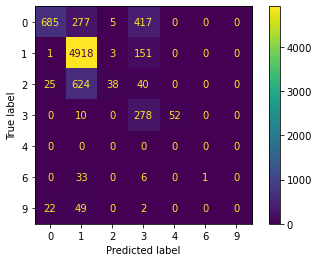

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=clf_2_y_preds)

## Helper function to visualize the lithology curve

### Never run this cell
lithology = {
    30000: [0, "Sandstone"],
    65000: [1, "Shale"],
    65030: [2, "Sandstone/Stone"],
    70000: [3, "Limestone"],
    70032: [4, "Chalk"],
    74000: [5, "Dolomite"],
    80000: [6, "Marl"],
    86000: [7, "Anhydrite"],
    99000: [8, "Tuff"],
    90000: [9, "Coal"]
}
[1, 0, 2, 3, 8, 6, 7, 5, 4]
["Sandstone", "Shale", "Sandstone/Stone", "Limestone", "Tuff", "Marl", "Anhydrite", "Dolomite", "Chalk", "Coal"]

In [78]:
test_df["Predicted_Lithofacies"] = clf_2_y_preds

In [79]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[3, 6, 1, 2, 0, 9]
Length: 6, dtype: Int64

In [80]:
test_df["Predicted_Lithofacies"].unique()

array([4, 3, 1, 6, 0, 2])

In [ ]:
def make_facies_log_plot(logs, x1, x2, x3, x4, x5, Depth=False):

    logs = logs.fillna(0)
    if Depth == False:
        logs['Depth'] = logs.index
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    else:
        logs['Depth'] = logs[Depth]
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
        
    logs = logs.sort_values(by='Depth', ascending=True)

    facies_colors = [
        '#196F3D', '#FF0000', '#00FFFF', '#000000', '#ff9900', '#00cc00', '#660099', '#ff8100', '#7400b6', "#0099ff"
    ]

    facies_labels = [
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Anhydrite", "Tuff", "Coal"
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 10
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype(float).values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs["Predicted_Lithofacies"].astype(float).values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
    ax[0].plot(logs[x1], logs.Depth, '-g')
    ax[1].plot(logs[x2], logs.Depth, '-')
    ax[2].plot(logs[x3], logs.Depth, '-', color='0.5')
    ax[3].plot(logs[x4], logs.Depth, '-', color='r')
    ax[4].plot(logs[x5], logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    im1=ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join([
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Anhydrite", "Tuff", "Coal"
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((10*' ').join([
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Anhydrite", "Tuff", "Coal"
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel(x1)
    ax[0].set_xlim(0, logs[x1].max())
    ax[1].set_xlabel(x2)
    ax[1].set_xlim(1.8, logs[x2].max())
    ax[2].set_xlabel(x3)
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlabel(x4)
    ax[3].set_xlim(0, logs[x4].max())
    ax[4].set_xlabel(x5)
    ax[4].set_xscale('log')
    ax[4].set_xlim(logs[x5].min(), logs[x5].max())
    ax[5].set_xlabel('Actual Lithofacies')
    ax[6].set_xlabel('Predicted Lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([]), ax[6].set_xticklabels([])
    f.suptitle('Well: NNNNN 05', fontsize=14,y=0.94)

In [83]:
import matplotlib.colors as colors

In [84]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [87]:
def make_well_facies_log_plot(logs, x1, x2, x3, x4, Depth=False):

    logs = logs.fillna(0)
    if Depth == False:
        logs['Depth'] = logs.index
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    else:
        logs['Depth'] = logs[Depth]
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
        
    logs = logs.sort_values(by='Depth', ascending=True)

    facies_colors = [
        '#196F3D', '#FF0000', '#00FFFF', '#000000', '#ff9900', '#00cc00', '#660099', '#ff8100', '#7400b6', "#0099ff"
    ]

    facies_labels = [
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Anhydrite", "Tuff", "Coal"
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 10
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype(float).values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs["Predicted_Lithofacies"].astype(float).values,1), 100, 1)
    
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    
    # Plotting the first four curves
    ax[0].plot(logs[x1], logs['Depth'], color='green', lw=0.5)
    ax[1].plot(logs[x2], logs['Depth'], color='red', lw=0.5)
    ax[2].plot(logs[x3], logs['Depth'], color='blue', lw=0.5)
    ax[3].plot(logs[x4], logs['Depth'], color='black', lw=0.5)
    
    # Plotting lithofacies
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    im1=ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=9)
    
    # Colorbars for lithofacies
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((10*' ').join([
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Anhydrite", "Tuff", "Coal"
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((10*' ').join([
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Anhydrite", "Tuff", "Coal"
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    # Common elements for each subplot
    curve_names = ["Gamma (gAPI)", "Density (g/cm3)", "Neutron (m3/m3)", "Resistivity (ohm.m)"]
    curve_colors = ["green", "red", "blue", "black"]
    
    for i, axi in enumerate(ax[:4]):
        axi.set_ylim(ztop, zbot)
        axi.set_xlabel(curve_names[i], color=curve_colors[i])
        axi.xaxis.set_ticks_position("top")
        axi.xaxis.set_label_position("top")
        axi.grid()
        if i == 2:
            axi.spines["top"].set_position(("axes", 1.04))
#         axi.set_xlim(0, logs[curve_names[i].split()[0]].max())
    
    for axi in [ax[0], ax[3]]:
        plt.setp(axi.get_yticklabels(), visible=False)
    
    ax[0].set_xlim(0, logs[x1].max())
    ax[1].set_xlim(0, logs[x2].max())
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlim(0, logs[x4].max())
    ax[4].set_xlabel('Actual Lithofacies')
    ax[5].set_xlabel('Predicted Lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[4].set_xticklabels([]), ax[5].set_xticklabels([])
    f.suptitle('Well: NNNNN 05', fontsize=14,y=0.94)

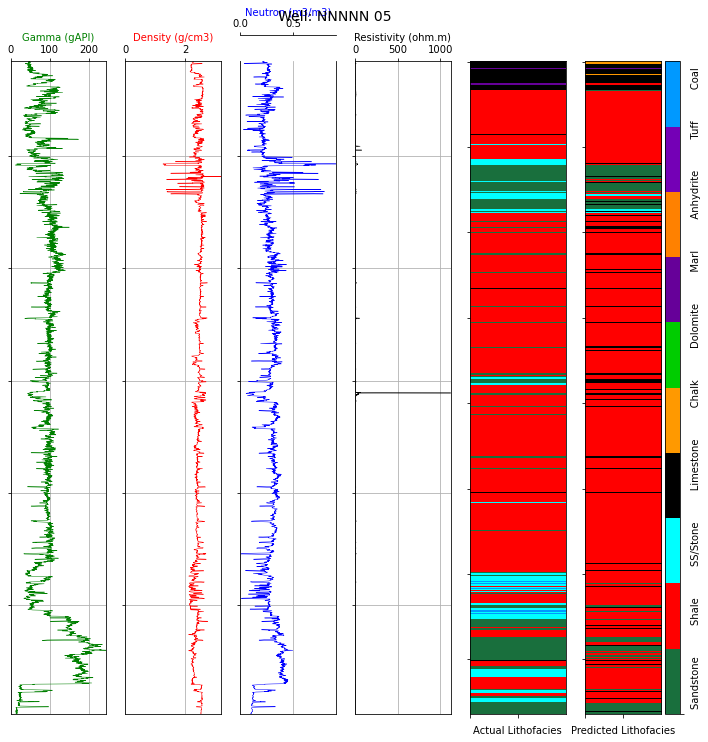

In [88]:
make_well_facies_log_plot(test_df, "GR", "RHOB", "NPHI", "RDEP")

In [ ]:
test_df.head()

In [ ]:
make_facies_log_plot(test_df, "GR", "CALI", "DTC", "NPHI", "RDEP")

In [ ]:
from hyperopt import fmin, tpe, hp